# Construction Building Analysis

[Prashant Brahmbhatt](https://www.github.com/hashbanger)

Importing the libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from warnings import filterwarnings

filterwarnings('ignore')
sns.set_style('darkgrid')

Importing the data

In [13]:
df = pd.read_csv('concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [14]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Checking for any missing values.

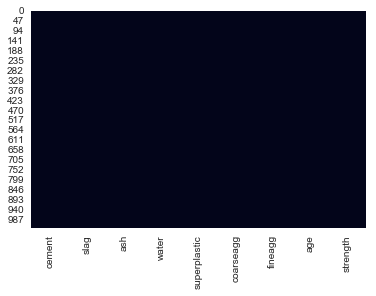

In [15]:
sns.heatmap(df.isna(), cbar = False)
plt.show()

If by chance a single or couple values are missing, we can confirm this by calculating.

In [16]:
for col in df.columns:
    print("Missing values in ", col," : ",sum(df.isna()[col]))

Missing values in  cement  :  0
Missing values in  slag  :  0
Missing values in  ash  :  0
Missing values in  water  :  0
Missing values in  superplastic  :  0
Missing values in  coarseagg  :  0
Missing values in  fineagg  :  0
Missing values in  age  :  0
Missing values in  strength  :  0


So there are no missing values.

#### Here the 'strength' is our target variable. So let's take a look at the distribution of the target Variable.

Skewness of the distribution: 0.416977
Kurtosis of the distribution: -0.313725


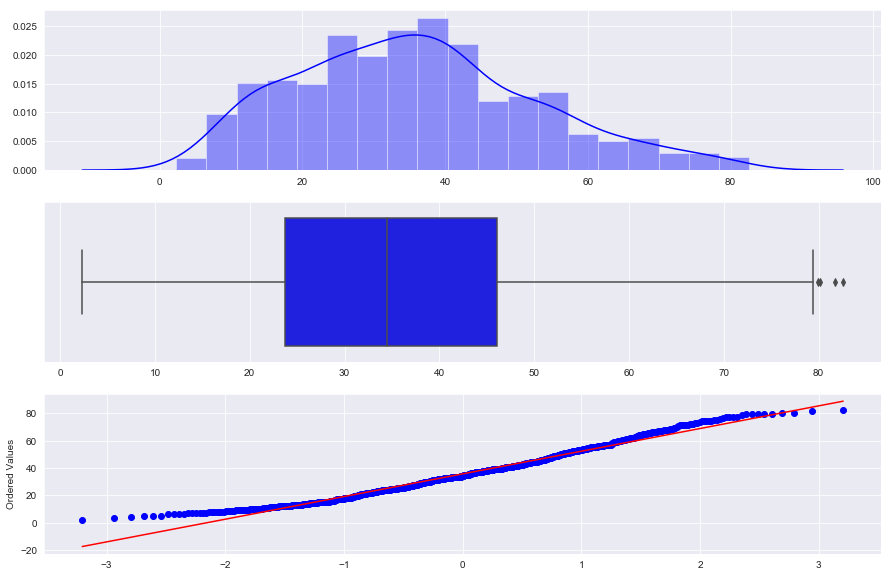

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
sns.distplot(df['strength'], color= 'b')
plt.xlabel('')
plt.subplot(3,1,2)
sns.boxplot(df['strength'], color= 'b')
plt.xlabel('')
plt.subplot(3,1,3)
res = stats.probplot(df['strength'], plot = plt)
plt.xlabel('')
plt.title('')
print("Skewness of the distribution: %f" % df['strength'].skew())
print("Kurtosis of the distribution: %f" % df['strength'].kurtosis())

- From the Histogram and Probability plot we can see that our distribution is not too far of the normal distribution.
    - The low Skewness shows our data is mostly at the centre just as a normal distribution.
    - The negative kurtosis showing that the amount of outliers is low.
- From the box plot we can see we seem to have only a few outliers at the higher end. We can also calculate those outliers mathematically

In [18]:
q1, q3 = df['strength'].quantile([0.25,0.75])
print("No. of outliers at higher end: ",len(df[df['strength'] > q3 + 1.5*(q3 - q1)]))

No. of outliers at higher end:  4


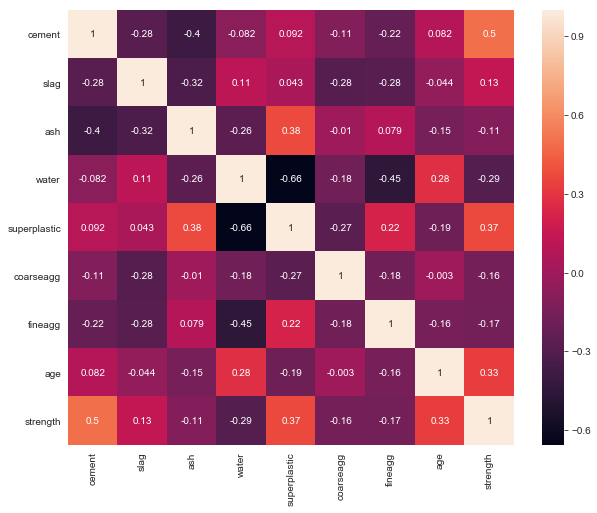

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

We can have another look if any possible relationship is there using the bivariate analysis.

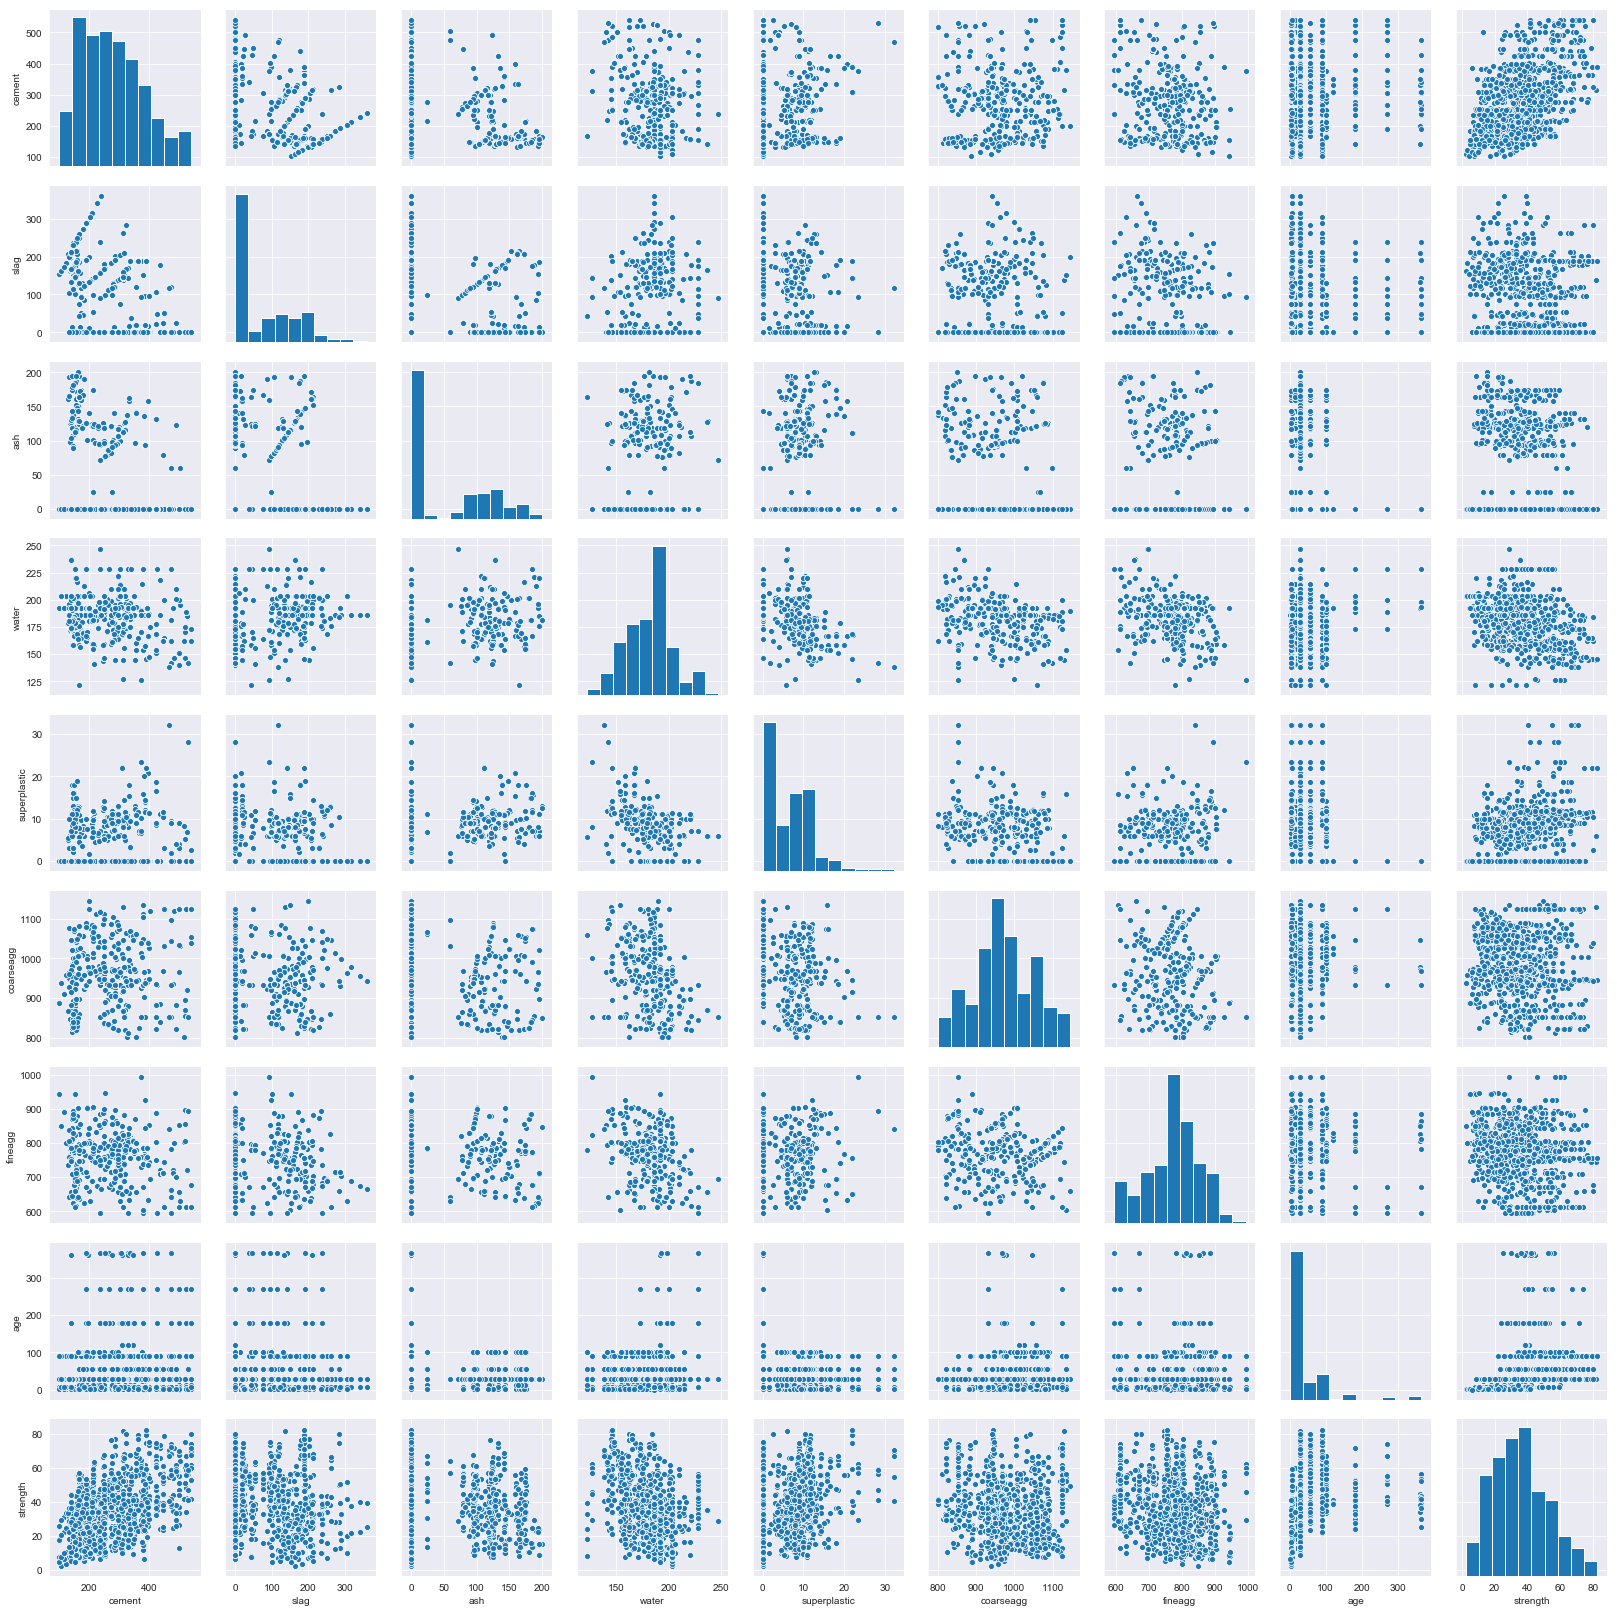

In [20]:
sns.pairplot(df)
plt.show()

There doesn't seem to be any significant relation of **strength** with any other variable, however there is some noticable correlation with **cement**. We shall have a look at it.

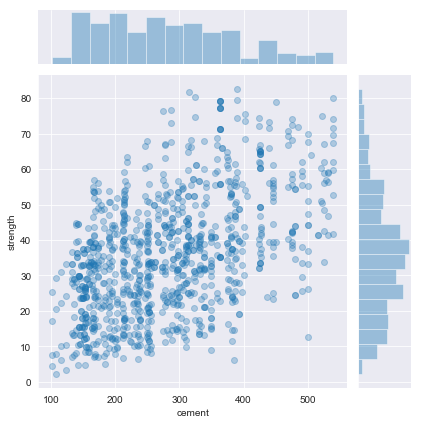

In [21]:
sns.jointplot(df['cement'], df['strength'], alpha  = 0.3)
plt.show()

There is some correlation of about 0.5 but it isn't significant enough.

In [22]:
# plt.figure(figsize=(20, 30))
# for i, col in enumerate(df.columns):
#     plt.subplot(5,2,i+1)
#     sns.distplot(df[col], color= 'g')
#     sns.kdeplot(df[col], shade= True, c = 'g')
# plt.show()

We can also compare all the distributions to every other feature.

We can look at the distributions of the features before and after scaling.

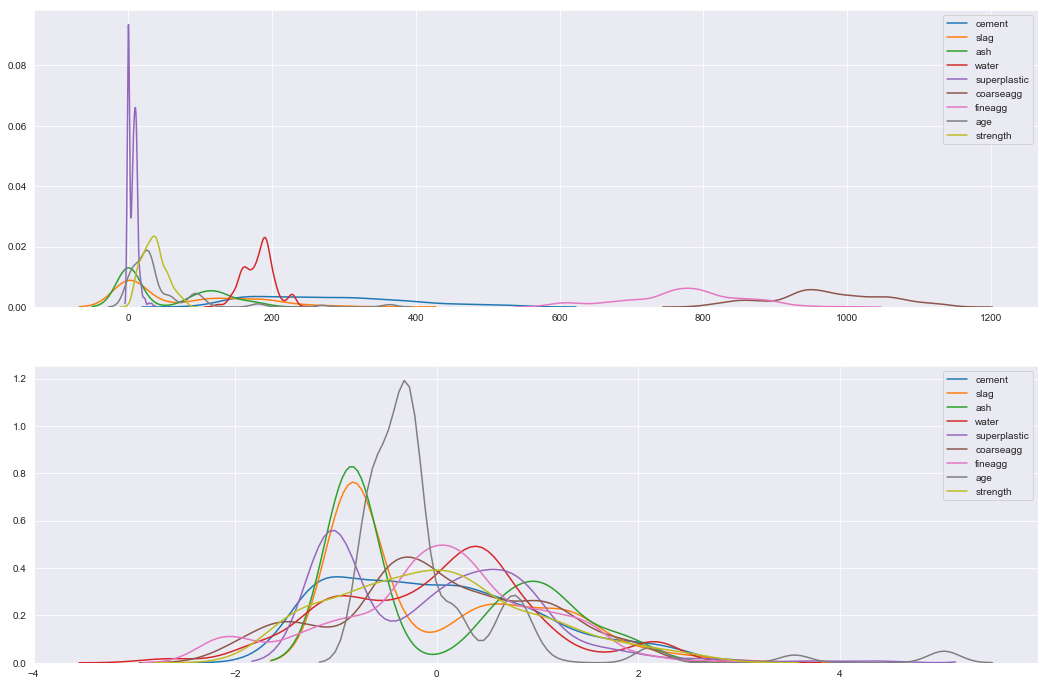

In [23]:
plt.figure(figsize=(18,12))
plt.subplot(2,1,1)
for col in df.columns:
    sns.kdeplot(df[col])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
temp = pd.DataFrame(scaler.fit_transform(df))
temp.columns = df.columns
# plt.figure(figsize=(25,10))
plt.subplot(2,1,2)
for col in temp.columns:
    sns.kdeplot(temp[col])

plt.show()

In [24]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
df_norm = pd.DataFrame(norm.fit_transform(df))

In [25]:
df_norm.head()

,0,1,2,3,4,5,6,7,8
0,0.111269,0.166942,0.000000,0.160249,0.000000,0.765257,0.589416,0.022049,0.023537
1,0.123388,0.030829,0.090806,0.115645,0.007890,0.789569,0.581657,0.010228,0.017175
2,0.188137,0.000000,0.072019,0.141027,0.004139,0.720111,0.648093,0.021071,0.021989
3,0.220434,0.094472,0.000000,0.188944,0.000000,0.772349,0.555229,0.023204,0.037996
4,0.119480,0.141555,0.000000,0.149196,0.007024,0.808423,0.537739,0.021611,0.014117


Choosing the best features as per Variance Inflation Factor

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = np.array(df.iloc[:, :-1])

[[variance_inflation_factor(X, i), i] for i in range(X.shape[1])]

[[15.456716721850174, 0],
 [3.329127167858221, 1],
 [4.1478331464409814, 2],
 [82.1575690843567, 3],
 [5.471093727729409, 4],
 [84.9557786410409, 5],
 [72.79099547091855, 6],
 [1.6994592714144867, 7]]

So as per the general rule of VIF we would not include features having VIF > 5

So the model will contain columns, 4,7,8.

In [27]:
X = df_norm.iloc[:,[1,2,4,7]]
y = df_norm.iloc[:, -1]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
import statsmodels.api as sm
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      8   R-squared (uncentered):                   0.806
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              1067.
Date:                Fri, 03 Apr 2020   Prob (F-statistic):                        0.00
Time:                        01:09:16   Log-Likelihood:                          2981.7
No. Observations:                1030   AIC:                                     -5955.
Df Residuals:                    1026   BIC:                                     -5936.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1              0.0861      0.006     15.316      0.000       0.075       0.097
2              0.0314      0.009      3.561      0.000       0.014       0.049
4              2.1542      0.096     22.461      0.000       1.966       2.342
7              0.1960      0.008     25.455      0.000       0.181       0.211
==============================================================================
Omnibus:                       12.790   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.503
Skew:                          -0.021   Prob(JB):                     3.53e-05
Kurtosis:                       3.690   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

______